In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red = pd.read_csv('winequality-red.csv',sep=';')
white = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
with open('winequality.names','r') as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [6]:
# Linking red and white wine datasets together
white['type'] = 'white'
red['type'] = 'red'
wine = pd.concat([white,red])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
# Shuffling data-shuffle the sample data, but keep the data for each sample the same
wine_shuff = wine.sample(frac=1).reset_index(drop=True)
# After mixing, the index of the dataset is still sorted according to the normal order.
wine_shuff.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5,red
1,5.9,0.25,0.24,7.4,0.044,21.0,113.0,0.99462,3.38,0.58,10.5,6,white
2,5.9,0.15,0.31,5.8,0.041,53.0,155.0,0.99450,3.52,0.46,10.5,6,white
3,10.4,0.52,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6,red
4,6.8,0.35,0.44,6.5,0.056,31.0,161.0,0.99520,3.14,0.44,9.5,5,white


In [8]:
# Checking for NULL Values
Sum =wine_shuff.isnull().sum()
Sum

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

<AxesSubplot:>

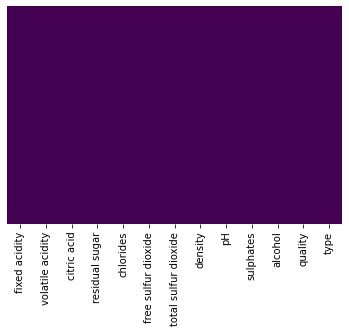

In [9]:
# Looking NA values with heatmap
import seaborn as sns
sns.heatmap(wine_shuff.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
wine_shuff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
# Is a certain type of wine (red or white) associated with higher quality?
wine_shuff.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [12]:
# Correlation between Quality and Features
correlation=wine_shuff.corr()
quality_corr=correlation["quality"]
quality_corr=quality_corr.sort_values(ascending=False)
#quality_corr_lower=quality_corr[(quality_corr)<0.2]
#quality_corr_higher=quality_corr[(quality_corr)>0.2]
quality_corr

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [13]:
df_x = wine_shuff.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.80
1,5.9,0.25,0.24,7.4,0.044,21.0,113.0,0.99462,3.38,0.58,10.50
2,5.9,0.15,0.31,5.8,0.041,53.0,155.0,0.99450,3.52,0.46,10.50
3,10.4,0.52,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.40
4,6.8,0.35,0.44,6.5,0.056,31.0,161.0,0.99520,3.14,0.44,9.50
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.5,0.19,0.34,1.6,0.029,39.0,116.0,0.98954,3.21,0.68,12.50
6493,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05
6494,5.9,0.21,0.28,4.6,0.053,40.0,199.0,0.99640,3.72,0.70,10.00
6495,6.0,0.26,0.15,1.3,0.060,51.0,154.0,0.99354,3.14,0.51,8.70


In [14]:
# Take target variable (quality) in Y
df_y = wine_shuff.iloc[:, [11]]
df_y

,quality
0,5
1,6
2,6
3,6
4,5
...,...
6492,6
6493,7
6494,4
6495,5


In [15]:
from sklearn.model_selection import train_test_split
# split the features and target data sets into train and test sets
# training set: the data used to fit the model
# test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)
# putting 80% of our data in the training set and 20% of our data in the test set 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=521)
print('train/test shapes:')
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

train/test shapes:
(5197, 11) (1300, 11) (5197, 1) (1300, 1)


In [16]:
# fit the linear model and test the score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
mrl=linear_model.LinearRegression()
mrl.fit(x_train, y_train) # the training set is used to build the model

LinearRegression()

In [17]:
mrl.predict(x_test) # the test set is used to predict

array([[5.18617788],
       [6.23796706],
       [5.84950259],
       ...,
       [5.13203777],
       [6.28294818],
       [4.89733575]])

In [18]:
coef_arr = mrl.coef_
print('coefficient = ', coef_arr)
# The regression coefficient is a parameter in the regression equation that expresses 
# the magnitude of the influence of the independent variable x on the dependent variable y. 
# A larger regression coefficient indicates that x has a greater influence on y, 
# a positive regression coefficient indicates that y increases as x increases, 
# and a negative regression coefficient indicates that y decreases as x increases.

coefficient =  [[ 5.40720789e-02 -1.35162467e+00 -9.05110863e-02  4.33637827e-02
  -1.40516485e-01  6.12090183e-03 -2.65196717e-03 -4.88399453e+01
   4.17204609e-01  7.81185920e-01  2.85754134e-01]]


In [19]:
# compare the predicted value with the true value,and rate them
test_score = mrl.score(x_test,y_test)
print('test score of model = ', test_score) # R_squared: the regression line explains 29% of the total variation in the response values.

# For the correlation coefficient r, |r|≤1, the closer |r| is to 1, 
# the greater the degree of correlation; the closer |r| is to 0, the smaller the degree of correlation.

# R² can also be used to determine the degree of fit. The closer the value of R² is to 1, 
# the better the fit of the regression line to the observed values; on the contrary, 
# the smaller the value of R², the worse the fit of the regression line to the observed values.

test score of model =  0.25821041595271277


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor 
# A modeling pipeline that first transforms the data using StandardScaler(),
# and then fits the model using the random forest regressor RandomForestRegressor().
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators= 100)) 

In [21]:
# Declaring hyperparameters
# Hyperparameters are parameters whose values are set before starting the learning process, 
# not parameter data obtained through training. Usually, hyperparameters need to be optimized, 
# and a set of optimal hyperparameters is selected for the learning machine to improve the performance and effect of learning.
hyperparameters = { 'randomforestregressor__max_features' : [ 'auto', 'sqrt', 'log2'], 
                   'randomforestregressor__max_depth':[ None, 5, 3, 1]}

In [22]:
# Model tuning
# Cross-validation is a process of reliably estimating the performance of a method that builds a model 
# by training and evaluating our model multiple times using the same method.
from sklearn.model_selection import GridSearchCV 
mrl2 = GridSearchCV(pipeline,hyperparameters,cv= 5) 
mrl2.fit(x_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [23]:
# Predict x_test after using cross-validation
pred = mrl2.predict(x_test) 
pred

array([5.12, 6.08, 5.64, ..., 5.37, 6.31, 5.05])

In [24]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error,r2_score,precision_score
print("The R² value of mrl2 is：",r2_score(y_test,pred)) 
# Our R² increased from 39% to 46%. This means that the fit becomes higher.
print("The MSE of mrl2 is：",mean_squared_error(y_test, pred))
# Mean square error is the expected value that reflects the degree of difference between the estimator and the real quantity.
# It is often used to evaluate the degree of change in the data and predict the accuracy of the data.

The R² value of mrl2 is： 0.5078684137467961
The MSE of mrl2 is： 0.3608273846153846


In [25]:
x_pre=pd.DataFrame({"fixed acidity":[6.4,7.1],
                    "volatile acidity":[0.27,0.28],
                    "citric acid":[0.30,0.35],
                    "residual sugar":[1.6,3.5],
                    "chlorides":[0.040,0.028],
                    "free sulfur dioxide":[19.0,35.0],
                    "total sulfur dioxide":[86.0,91.0],
                    "density":[0.99089,0.99022],
                    "pH":[3.32,2.96],
                    "sulphates":[0.65,0.33],
                    "alcohol":[11.5,12.1]})
x_pre

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.4,0.27,0.30,1.6,0.040,19.0,86.0,0.99089,3.32,0.65,11.5
1,7.1,0.28,0.35,3.5,0.028,35.0,91.0,0.99022,2.96,0.33,12.1


In [26]:
mrl2.predict(x_pre) 

array([6.07, 5.62])

In [27]:
#pip install PySimpleGUI

In [28]:
import PySimpleGUI as sg

In [29]:
# Define the layout, create the number of rows
layout = [      [sg.Text("Please Enter the Features of the Wine：")],      
                [sg.Text("Fixed Acidity: "),sg.InputText(key="1")],
                [sg.Text("Volatile Acidity: "),sg.InputText(key="2")],
                [sg.Text("Citric Acid: "),sg.InputText(key="3")],
                [sg.Text("Residual Sugar: "),sg.InputText(key="4")],
                [sg.Text("Chlorides: "),sg.InputText(key="5")],
                [sg.Text("Free Sulfur Dioxide: "),sg.InputText(key="6")],
                [sg.Text("Total Sulfur Dioxide: "),sg.InputText(key="7")],
                [sg.Text("Density: "),sg.InputText(key="8")],
                [sg.Text("Ph: "),sg.InputText(key="9")],
                [sg.Text("Sulphates: "),sg.InputText(key="10")],
                [sg.Text("Alcohol: "),sg.InputText(key="11")],
                [sg.Button("Forecast Quality")]
         ]

In [30]:
# create window
window = sg.Window("Wine Quality Predictor",layout)

In [31]:
while True:
        event,values = window.read()
        if event == "Forecast Quality":
           
           quality = mrl2.predict([[values['1'],values['2'],values['3'],values['4'],values['5'],values['6'],
                                 values['7'],values['8'],values['9'],values['10'],values['11']]])
            
           quality = "The quality of the wine is \n" + str(int(quality)) 
        
           sg.popup(quality,title= "Forecast Result")
            
        if event == None:
           break
window.close()